In [8]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = [16,8]

# Boa para prever dados sem tendencia e sem padrão sazonal claro

In [9]:
df = pd.read_excel('serie_historica_volume_portos.xlsx')
planta = input("Qual planta e processo para escolher: ")

In [10]:
df_2 = df[df['PLANTA_PROCESSO'] == planta]
df_2.sort_values('DATA')

,PLANTA_PROCESSO,DATA,TOTAL_VALOR
7404,1089 - Tubarão | EMBARQUE,2017-08-31 12:00:00,306232.891
5602,1089 - Tubarão | EMBARQUE,2017-09-01 12:00:00,373741.182
5629,1089 - Tubarão | EMBARQUE,2017-09-02 12:00:00,361929.437
5415,1089 - Tubarão | EMBARQUE,2017-09-03 12:00:00,294236.001
5990,1089 - Tubarão | EMBARQUE,2017-09-04 12:00:00,104105.517
...,...,...,...
6467,1089 - Tubarão | EMBARQUE,2022-08-25 12:00:00,283218.526
6957,1089 - Tubarão | EMBARQUE,2022-08-26 12:00:00,255238.834
7406,1089 - Tubarão | EMBARQUE,2022-08-27 12:00:00,280564.397
7604,1089 - Tubarão | EMBARQUE,2022-08-28 12:00:00,222464.718


In [11]:
df_g = df_2.resample(rule='M', on='DATA')['TOTAL_VALOR'].sum()

Aplicando o modelo de Suavização Exp Simples

In [12]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [13]:
fit1 = SimpleExpSmoothing(df_g).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename(r'alpha=0.2$')

<AxesSubplot: xlabel='DATA'>

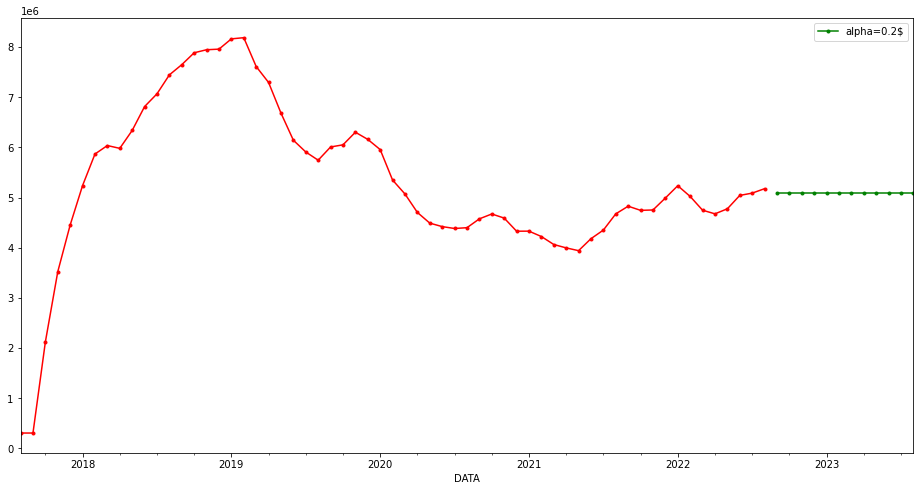

In [14]:
fcast1.plot(marker='.', color='green', legend=True)
fit1.fittedvalues.plot(marker='.', color='red')

c:\Users\LVVE2K631\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot: xlabel='DATA'>

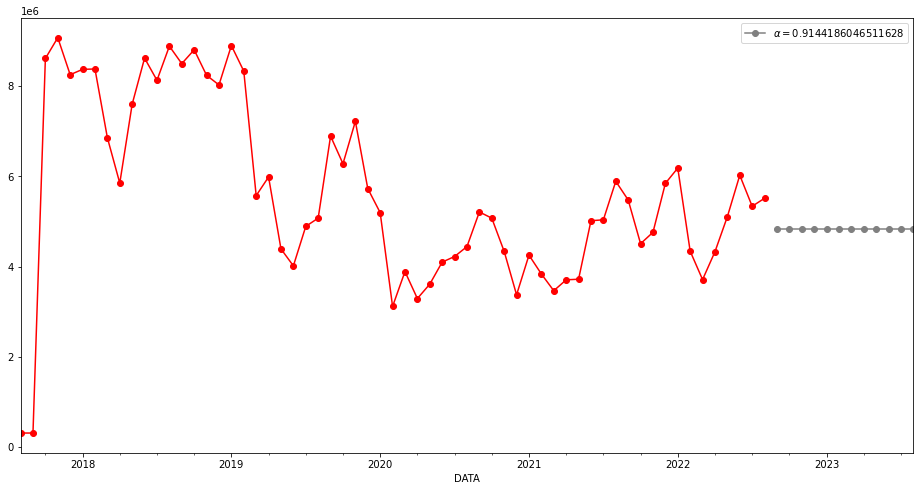

In [15]:
# Otimizando o valor de alpha
fit2 = SimpleExpSmoothing(df_g).fit()
fcast2 = fit2.forecast(12).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])

fcast2.plot(marker='o', color='gray', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')